In [22]:
# import necessary packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import KFold # k-fold cv
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%precision %.7g
%matplotlib inline

## 7. Using years and IMDB user score, which clustering models (K means, Gaussian Mixture Models, Hierarchical Clustering, or DBSCAN) would create the best clusters for our dataset?

### 7a) the analysis code

In [37]:
data = pd.read_csv("https://raw.githubusercontent.com/tarekel96/MoviesData/master/movies.csv")
data.head()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,1,70136369,Ferris Bueller's Day Off,PG-13,2,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [38]:
#ggplot(data, aes(x = "year released", y = "score")) + geom_point() + theme_minimal()

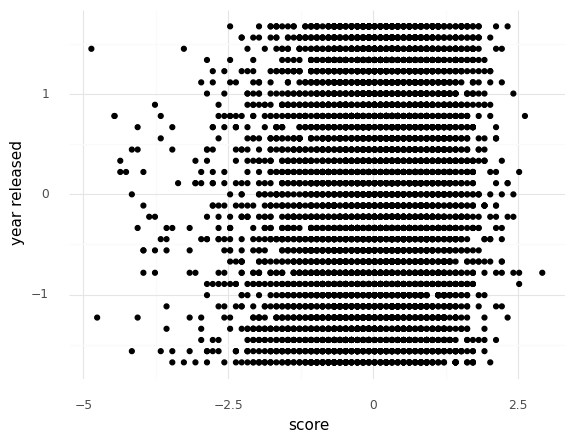

<ggplot: (8791698792617)>

In [39]:
features = ["year released", "score"]
X = data[features]

z = StandardScaler()
X[["year released", "score"]] = z.fit_transform(X)

(ggplot(X, aes("score", "year released")) + geom_point() + theme_minimal())

## KMeans

In [40]:
#km = KMeans(n_clusters = 2)
#km.fit(X)

#membership = km.predict(X)

#X["cluster"] = membership

#(ggplot(X, aes("year released", "score", color = "membership")) + geom_point())

In [41]:
#silhouette_score(X, membership)

## Hierarchical

In [42]:
#features = ["year released", "score"]

#X = data[features]


#hac = AgglomerativeClustering(affinity = "euclidean",
#                             linkage = "centroid")

In [43]:
#hac.fit(X)

#dendro = sch.dendrogram(sch.linkage(X, method='centroid'))

## GMM

In [44]:
#features = ["year released","score"]
#X = data[features]

#z = StandardScaler()
#X[features] = z.fit_transform(X)

In [45]:
EM = GaussianMixture(n_components = 2)
EM.fit(X)

GaussianMixture(n_components=2)

In [46]:
cluster = EM.predict(X)
cluster

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
print("SILHOUETTE: ", silhouette_score(X, cluster))

SILHOUETTE:  0.37352602092542114


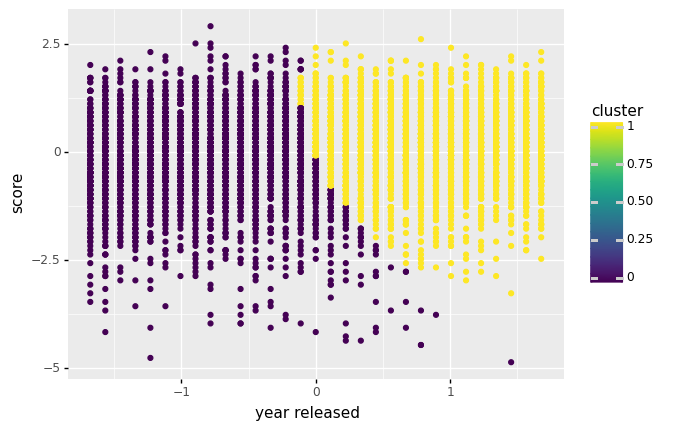

<ggplot: (8791699448751)>

In [34]:
X["cluster"] = cluster

(ggplot(X, aes(x = "year released", y = "score", color = "cluster")) + geom_point())

## DBSCAN

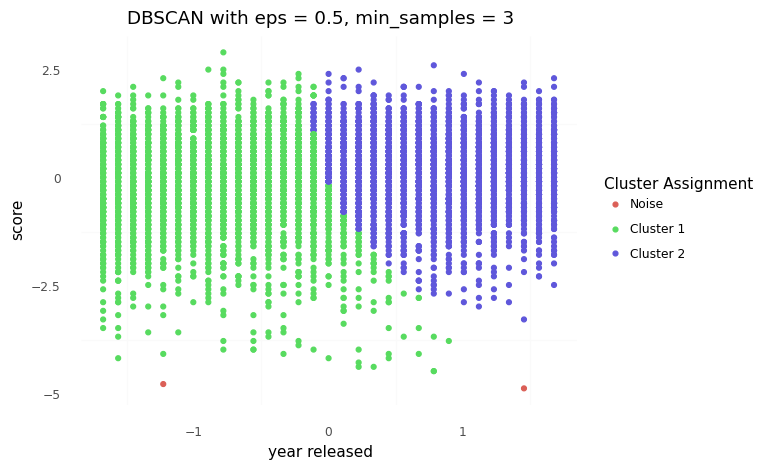

<ggplot: (8791745151910)>

In [35]:
# dbscan and plot

#z = StandardScaler()
#X[["year released", "score"]] = z.fit_transform(X)

#(ggplot(X, aes("year released", "score")) + geom_point())

data = DBSCAN(eps = 0.5, min_samples = 3).fit(X)

#noise cluster
labsList = ["Noise"]

#adding all other clusters to noise cluster 
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(data.labels_)))]

X["assignments"] = data.labels_

(ggplot(X, aes(x = "year released", y = "score", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

In [36]:
# grab only clustered data points
X_clustered = X.loc[(X.assignments >= 0)]

print(silhouette_score(X_clustered[["year released","score"]], X_clustered["assignments"]))

# overall 
print(silhouette_score(X[["year released","score"]], X["assignments"]))

0.3738741656303404
0.36726566055177484


### 7b) Explicit answer to the question with detailed responses of how you came to this answer and the answer's importance. This should be targeted at an audience that are NOT familiar with Data Science (e.g. pretend you're presenting these results to shareholders/your boss)

### 7c) Two ggplot data visualizations + captions (graphs will be graded on how efficient and clear they are, so make sure you make good aesthetic choices that help emphasize your message)

## 8. Assess the performance of the best model from question 7. Additionally, how is the model performance affected when runtime is added as a variable?

### 8a) The analysis code

In [49]:
new_features = ["year released", "score", "runtime"]
new_X = data[new_features]

z = StandardScaler()
new_X[new_features] = z.fit_transform(new_X)

new_X.head()

#(ggplot(X, aes("score", "year released")) + geom_point() + theme_minimal())

,year released,score,runtime
0,-1.677164,1.719825,-0.973621
1,-1.677164,1.420743,-0.197002
2,-1.677164,0.523496,0.191308
3,-1.677164,2.018907,1.689073
4,-1.677164,0.523496,-0.918148


In [50]:
EM = GaussianMixture(n_components = 3)
EM.fit(new_X)

GaussianMixture(n_components=3)

In [51]:
cluster = EM.predict(new_X)
cluster

array([0, 0, 0, ..., 2, 2, 2])

In [52]:
print("SILHOUETTE: ", silhouette_score(new_X, cluster))

SILHOUETTE:  0.28610686925562406


In [53]:
new_X["cluster"] = cluster

### 8b) Explicit answer to the question with detailed responses of how you came to this answer and the answer's importance. This should be targeted at an audience that are NOT familiar with Data Science (e.g. pretend you're presenting these results to shareholders/your boss)

### 8c) Two ggplot data visualizations + captions (graphs will be graded on how efficient and clear they are, so make sure you make good aesthetic choices that help emphasize your message)

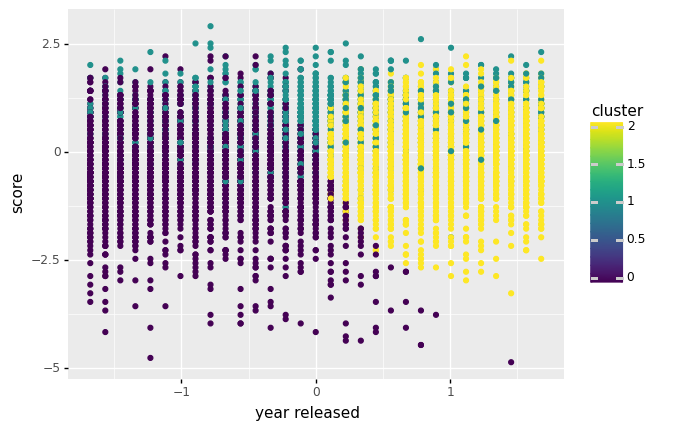

<ggplot: (8791702973555)>

In [55]:
# First ggplot (years on the x-axis and scores on the y-axis)

(ggplot(new_X, aes(x = "year released", y = "score", color = "cluster")) + geom_point())

In [ ]:
# Second ggplot 
(ggplot(new_X, aes(x = "", y = "", color = "cluster")) + geom_point())

## 9. Using the best model from question 7, create a scatter plot (years vs score) colored by cluster assignments. Describe what each cluster represents.

### 9a) The analysis code

### 9b) Explicit answer to the question with detailed responses of how you came to this answer and the answer's importance. This should be targeted at an audience that are NOT familiar with Data Science (e.g. pretend you're presenting these results to shareholders/your boss)

### 9c) Two ggplot data visualizations + captions (graphs will be graded on how efficient and clear they are, so make sure you make good aesthetic choices that help emphasize your message)